In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
airbnb = pd.read_csv('amsterdam_weekdays.csv')

In [30]:
airbnb.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [31]:
airbnb.tail()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1098,2486.115342,Entire home/apt,False,False,2,False,0,0,10,100,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,233.637194,Private room,False,True,2,False,1,0,10,90,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,317.062311,Private room,False,True,2,False,1,0,10,92,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1812.855904,Entire home/apt,False,False,4,False,0,0,8,84,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794
1102,258.008577,Shared room,True,False,2,False,0,0,8,90,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [32]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     1103 non-null   float64
 1   room_type                   1103 non-null   object 
 2   room_shared                 1103 non-null   bool   
 3   room_private                1103 non-null   bool   
 4   person_capacity             1103 non-null   int64  
 5   host_is_superhost           1103 non-null   bool   
 6   multi                       1103 non-null   int64  
 7   biz                         1103 non-null   int64  
 8   cleanliness_rating          1103 non-null   int64  
 9   guest_satisfaction_overall  1103 non-null   int64  
 10  bedrooms                    1103 non-null   int64  
 11  dist                        1103 non-null   float64
 12  metro_dist                  1103 non-null   float64
 13  attr_index                  1103 

In [33]:
airbnb['room_type'].nunique()

3

In [34]:
airbnb['room_type'].value_counts()

Private room       559
Entire home/apt    538
Shared room          6
Name: room_type, dtype: int64

In [35]:
roomtypes = pd.get_dummies(airbnb['room_type'])

In [36]:
roomtypes

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1098,1,0,0
1099,0,1,0
1100,0,1,0
1101,1,0,0


In [37]:
roomtypes.drop('Shared room',inplace=True,axis=1)

In [38]:
roomtypes

,Entire home/apt,Private room
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1098,1,0
1099,0,1
1100,0,1
1101,1,0


In [39]:
airbnb = pd.concat([airbnb,roomtypes],axis=1)

In [40]:
airbnb.drop('room_type',inplace=True,axis=1)

In [41]:
airbnb['room_shared']=airbnb['room_shared'].map({True:1,False:0})

In [43]:
airbnb['room_private']=airbnb['room_private'].map({True:1,False:0})

In [45]:
airbnb['host_is_superhost']=airbnb['host_is_superhost'].map({True:1,False:0})

In [47]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     1103 non-null   float64
 1   room_shared                 1103 non-null   int64  
 2   room_private                1103 non-null   int64  
 3   person_capacity             1103 non-null   int64  
 4   host_is_superhost           1103 non-null   int64  
 5   multi                       1103 non-null   int64  
 6   biz                         1103 non-null   int64  
 7   cleanliness_rating          1103 non-null   int64  
 8   guest_satisfaction_overall  1103 non-null   int64  
 9   bedrooms                    1103 non-null   int64  
 10  dist                        1103 non-null   float64
 11  metro_dist                  1103 non-null   float64
 12  attr_index                  1103 non-null   float64
 13  attr_index_norm             1103 

In [51]:
def normalize(x):
    return (x-np.min(x))/(max(x)-min(x))

airbnb = airbnb.apply(normalize)

In [52]:
airbnb.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,Entire home/apt,Private room
0,0.008511,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.9125,0.2,0.448253,0.572030,0.020437,0.020437,0.034226,0.034226,0.553364,0.956489,0.0,1.0
1,0.028137,0.0,1.0,0.5,0.0,0.0,0.0,0.666667,0.8125,0.2,0.042367,0.046367,0.319462,0.319462,0.568118,0.568118,0.529392,0.628645,0.0,1.0
2,0.017666,0.0,1.0,0.0,0.0,0.0,1.0,0.833333,0.8375,0.2,0.513179,0.826234,0.018588,0.018588,0.032155,0.032155,0.848472,0.528252,0.0,1.0
3,0.039802,0.0,1.0,0.5,0.0,0.0,1.0,0.833333,0.8750,0.4,0.033101,0.092185,0.244824,0.244824,0.595391,0.595391,0.504399,0.646095,0.0,1.0
4,0.046598,0.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.9750,0.2,0.047411,0.064489,0.277059,0.277059,0.552243,0.552243,0.531347,0.634386,0.0,1.0


<AxesSubplot:>

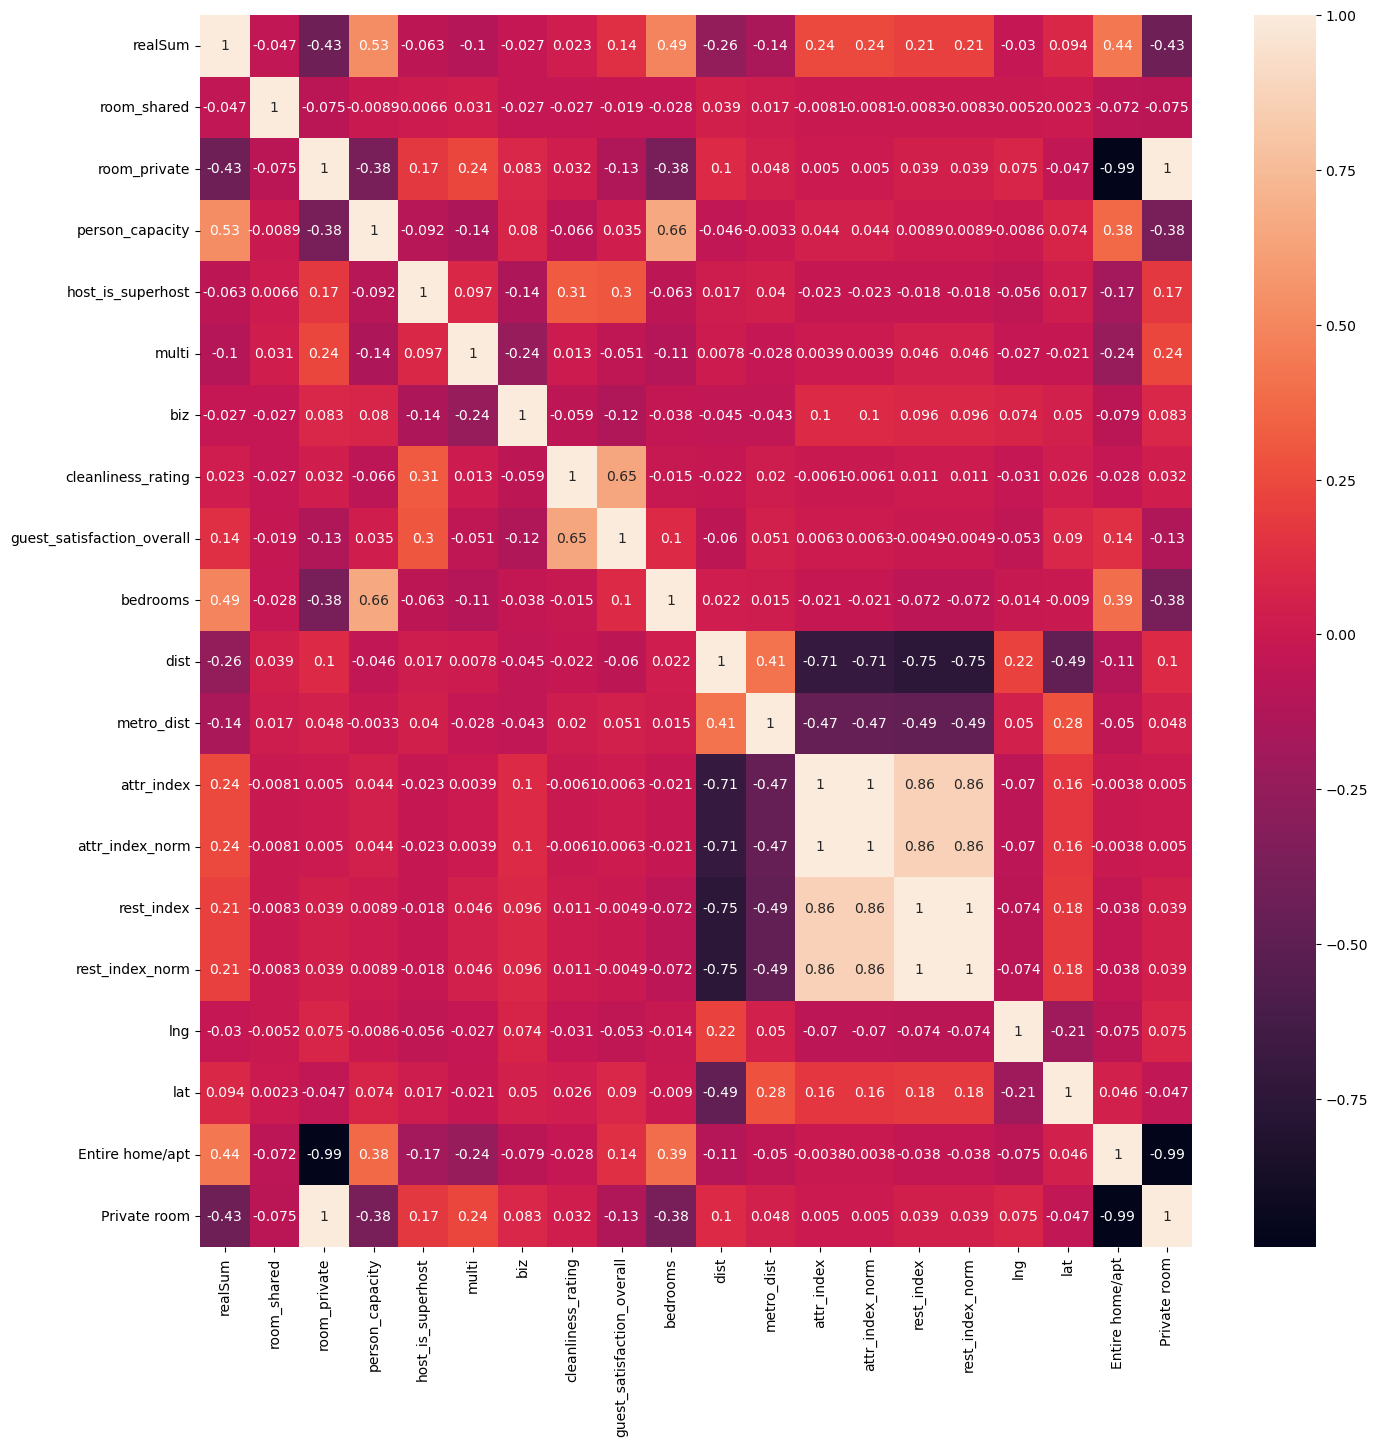

In [53]:
plt.figure(figsize=(16,16))
sns.heatmap(data=airbnb.corr(),annot=True)

In [54]:
airbnb.drop(['lat','lng','cleanliness_rating','biz','host_is_superhost','room_shared'],inplace=True,axis=1)

In [55]:
airbnb

,realSum,room_private,person_capacity,multi,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,Entire home/apt,Private room
0,0.008511,1.0,0.0,1.0,0.9125,0.2,0.448253,0.572030,0.020437,0.020437,0.034226,0.034226,0.0,1.0
1,0.028137,1.0,0.5,0.0,0.8125,0.2,0.042367,0.046367,0.319462,0.319462,0.568118,0.568118,0.0,1.0
2,0.017666,1.0,0.0,0.0,0.8375,0.2,0.513179,0.826234,0.018588,0.018588,0.032155,0.032155,0.0,1.0
3,0.039802,1.0,0.5,0.0,0.8750,0.4,0.033101,0.092185,0.244824,0.244824,0.595391,0.595391,0.0,1.0
4,0.046598,1.0,0.0,0.0,0.9750,0.2,0.047411,0.064489,0.277059,0.277059,0.552243,0.552243,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,0.307973,0.0,0.0,0.0,1.0000,0.2,0.211311,0.319863,0.075918,0.075918,0.126010,0.126010,1.0,0.0
1099,0.013686,1.0,0.0,1.0,0.8750,0.2,0.421112,0.065305,0.036313,0.036313,0.060610,0.060610,0.0,1.0
1100,0.024585,1.0,0.0,1.0,0.9000,0.2,0.052210,0.163520,0.216249,0.216249,0.415446,0.415446,0.0,1.0
1101,0.220011,0.0,0.5,0.0,0.8000,1.0,0.172570,0.080451,0.117457,0.117457,0.206406,0.206406,1.0,0.0


Text(0, 0.5, 'price')

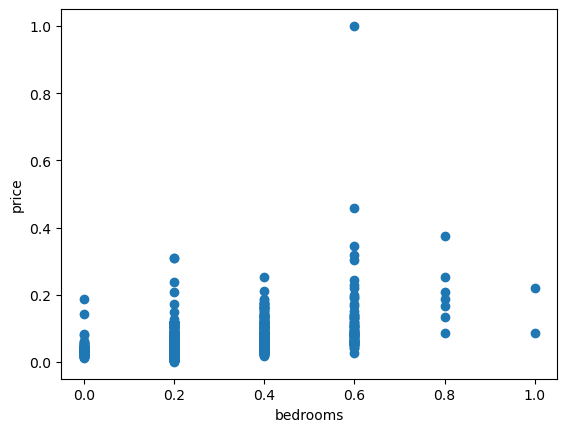

In [58]:
pltx = airbnb['bedrooms']
plty = airbnb['realSum']
plt.scatter(pltx,plty)
plt.xlabel("bedrooms")
plt.ylabel("price")

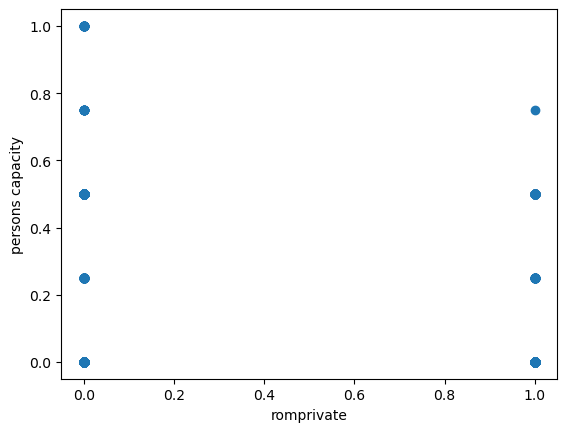

In [60]:
pltx = airbnb['room_private']
plty = airbnb['person_capacity']
plt.xlabel("romprivate")
plt.ylabel("persons capacity")
plt.scatter(pltx,plty)

In [61]:
# x = airbnb[['room_private','person_capacity','multi','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index']]
airbnb.columns

Index(['realSum', 'room_private', 'person_capacity', 'multi',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm',
       'Entire home/apt', 'Private room'],
      dtype='object')

In [62]:
lx = [c for c in airbnb.columns if c!='realSum']

In [65]:
x = airbnb[lx]
y = airbnb['realSum']


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=101)

In [67]:
x_train.head()

,room_private,person_capacity,multi,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,Entire home/apt,Private room
997,0.0,0.25,0.0,0.9875,0.4,0.502489,0.361559,0.026713,0.026713,0.043763,0.043763,1.0,0.0
198,1.0,0.00,0.0,0.9250,0.2,0.033922,0.036435,0.612013,0.612013,0.508244,0.508244,0.0,1.0
174,1.0,0.00,1.0,1.0000,0.2,0.970139,0.166272,0.000592,0.000592,0.000986,0.000986,0.0,1.0
652,0.0,0.00,0.0,0.8750,0.0,0.621714,0.849811,0.011668,0.011668,0.020364,0.020364,1.0,0.0
995,1.0,0.00,0.0,0.9375,0.2,0.038354,0.117942,0.334652,0.334652,0.437860,0.437860,0.0,1.0


In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
y_predict = lr.predict(x_test)

In [73]:
y_predict.size

331

In [74]:
y_test.size

331

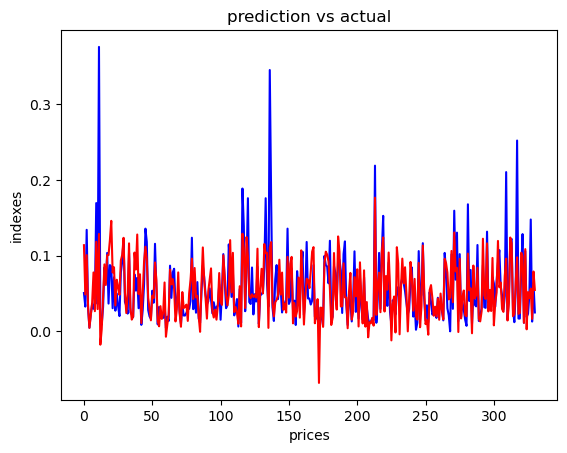

In [75]:
plt.title("prediction vs actual")
plt.xlabel("prices")
plt.ylabel("indexes")
z = [i for  i in range(len(y_predict))]
plt.plot(z,y_test,'blue')
plt.plot(z,y_predict,'red')

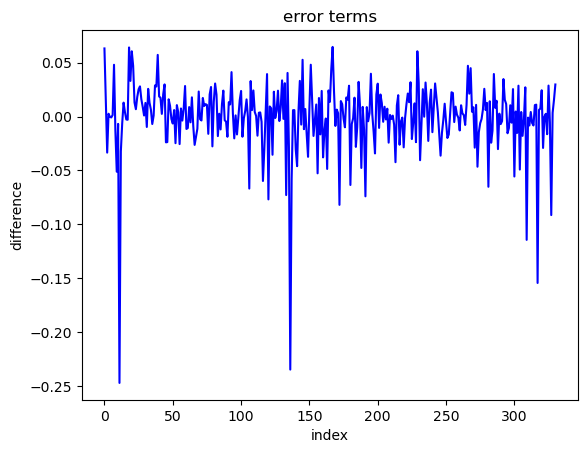

In [76]:
plt.title("error terms")
plt.ylabel("difference")
plt.xlabel("index")
plt.plot(z,y_predict-y_test,'b')

In [97]:
lr1 = LinearRegression(n_jobs=10)

In [98]:
lr1.fit(x_train,y_train)

LinearRegression(n_jobs=-3)

In [99]:
y_pred1 = lr1.predict(x_test)

In [100]:
y_pred1

array([ 1.13787318e-01,  4.87195808e-02,  1.00694328e-01,  3.33280183e-02,
        4.53045054e-03,  2.16762415e-02,  3.76129749e-02,  7.77881354e-02,
        2.65839876e-02,  1.18310838e-01,  2.93389469e-02,  1.28726187e-01,
       -1.76588183e-02,  2.67834332e-03,  4.49336200e-02,  8.84421464e-02,
        6.12255807e-02,  1.00640956e-01,  1.00764560e-01,  1.20598152e-01,
        1.45954873e-01,  7.76842368e-02,  8.45777504e-02,  3.41401750e-02,
        6.81191199e-02,  5.87877664e-02,  4.81328749e-02,  9.36092354e-02,
        1.01042192e-01,  1.23518997e-01,  5.15099682e-02,  2.41203113e-02,
        4.91747310e-02,  1.16208248e-01,  3.13577211e-02,  1.54415575e-02,
        1.95977971e-02,  1.04063430e-01,  8.16494893e-02,  1.27887887e-01,
        4.92178565e-02,  7.53398822e-02,  1.10161087e-02,  4.87794166e-02,
        9.19905849e-02,  1.11771616e-01,  9.44574007e-02,  4.42985426e-02,
        2.97744823e-02,  1.45209817e-02,  4.71564520e-02,  4.38058721e-02,
        9.09702001e-02,  

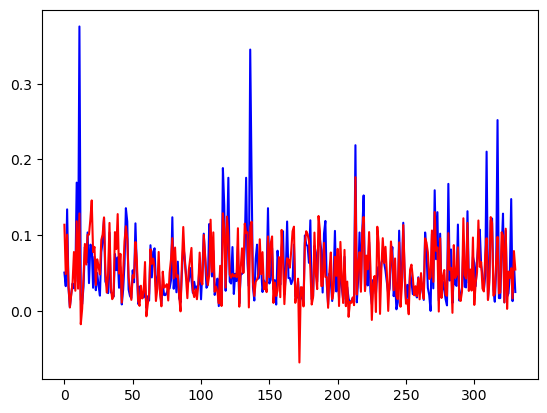

In [101]:
plt.plot(z,y_test,'blue')
plt.plot(z,y_pred1,'red')

numpy.float64